# CLASE 1.8: Una introducción (generosa) a la teoría de la información.
---
## Introducción.
En esta última sección introductoria abordaremos algunos conceptos que constituyen una de las bases fundamentales de la estadística moderna, y que resultan fundamentales en la formulación de muchísimos algoritmos de aprendizaje tanto supervisado como no supervisado, y que se fundamentan en un marco teórico de enorme importancia en la estadística moderna y que se conoce como **teoría de la información**, publicado en 1948 por el ingeniero eléctrico y matemático Claude Shannon. Dicha teoría, en su tiempo, respondió a un esfuerzo realizado por Shannon y otros profesionales y académicos para diseñar sistemas de comunicación que fueran tanto *eficientes* como *confiables*. A pesar de este origen más bien práctico, la teoría de la información tiene una base matemática profunda que está orientada a constituir la misma esencia del *proceso de comunicación*, y nos provee de un *framework* para el estudio de algunos aspectos fundamentales tales como la eficiencia en la representación de la información y las limitaciones asociadas a la transmisión confiable de información por medio de un determinado *canal de comunicación*. Además, la teoría comprende una colección de importantes teoremas que permiten calcular *cotas* ideales para la óptima representación y transmisión de señales que llevan consigo una determinada información. Tales cotas son de importancia, ya que nos proveen de valores de referencia (o *benchmarks*) para el diseño óptimo de sistemas de procesamiento de información.

El propósito esencial de esta sección es discutir algunos **modelos teóricos de información** que permitan formular algunos conceptos básicos relativos a la **auto-organización**, que a su vez es un concepto clave en el diseño de algoritmos de aprendizaje no supervisado.

## El concepto de entropía (de la información).

### Entropía de una variable aleatoria discreta.
Consideremos una variable aleatoria $X:\Omega \longrightarrow \mathbb{R}$ que, sin pérdida de generalidad, asumiremos como unidimensional. Supongamos que cada realización de $X$ puede ser idealizada como un *mensaje*. En estricto rigor, si la variable aleatoria $X$ es continua, entonces ésta lleva consigo una cantidad infinita de información. Sin embargo, en contextos físicos y biológicos, podemos reconocer que no tiene sentido hablar de información infinita, lo que sugiere que, en este contexto, el valor de $X$ puede estar cuantificado de manera uniforme en un número finito de niveles discretos. Por lo tanto, si las realizaciones de $X$ son mensajes, resulta mucho más idóneo tratar a $X$ como una variable aleatoria discreta, escribiéndola como

$$X=\left\{ x_{k}\in \mathbb{R} \  |\  k\in \mathbb{Z} \right\}  $$
<p style="text-align: right;">$(8.1)$</p>

donde el valor muestral $x_{k}$ es entero, siendo $2n+1$ el número total de valores que puede tomar $X$ (los *niveles discretos* previamente mencionados). La separación $\triangle x$ entre tales niveles se asume como lo suficientemente pequeña para que la ecuación (8.1), en efecto, nos provea de una representación adecuada de $X$. Naturalmente, no hay ningún problema en extender (8.1) al caso continuo haciendo tender $\triangle x$ a cero, en cuyo caso $n$ crecerá infinitamente y cualquier suma finita de valores muestrales de $X$ tendrá que ser representada por medio de integrales.

En un contexto general, sabemos que el evento $X=x_{k}$ ocurre con probabilidad $p_{k}=P(X=x_{k})$, tal que $0\leq p_{k}\leq 1$, de modo que $\sum^{n}_{k=-n} p_{k}=1$. Pongámonos en el caso en que $X=x_{k}$ tiene probabilidad $p_{k}=1$, lo que, por supuesto, requiere que $p_{i}=0$ para todo $i\neq k$. En esta situación, podemos establecer en que no existe ninguna "sorpresa" en la ocurrencia de $x_{k}$ y, por extensión, no se transmite ninguna información dada la ocurrencia de dicho evento, porque ya sabemos de antemano (con *total seguridad*) cuál será el mensaje asociado a $X=x_{k}$. Si, por el contrario, cada realización de $X$ ocurre con una probabilidad distinta y, en particular, el valor de $p_{k}$ es *pequeño* (relativamente hablando), entonces el mensaje transmitido por el evento $X=x_{k}$ sí será más "sorpresivo" y, por tanto, se transmitirá una *mayor cantidad* de información por la ocurrencia de dicho evento, en comparación a otros eventos con probabilidades mayores. De esta manera, los conceptos de incertidumbre, sorpresa e información son todos afines. Antes de la ocurrencia de $X=x_{k}$, existe una cierta cantidad de incertidumbre. Cuando el evento $X=x_{k}$ ocurre, existe una cierta cantidad de *sorpresa*. Y después de la ocurrencia de $X=x_{k}$, hay un incremento en la *cantidad* de información. Es evidente que estas tres *cantidades* son todas equivalentes. Además, dicha cantidad es inversamente proporcional a la probabilidad $p_{k}$.

La discusión anterior motiva la siguiente definición.

**<font color='blue'>Definición 8.1 – Cantidad de información:</font>** Sea $X$ una variable aleatoria discreta. Si $x_{k}$ representa la $k$-ésima realización de $X$, entonces la **cantidad de información** provista por el evento $X=x_{k}$, con probabilidad de ocurrencia $p_{k}=P(X=x_{k})$, se define como

$$I\left( x_{k}\right)  :=\log \left( \frac{1}{P\left( X=x_{k}\right)  } \right)  =-\log \left( p_{k}\right)  $$
<p style="text-align: right;">$(8.2)$</p>

La base del logaritmo en la ecuación (8.2) es completamente arbitraria, aunque suele hablarse de ciertas métricas de cuantificación de información para una determinada colección de bases. Por ejemplo, si la base es igual a $2$, decimos que cada unidad de información se mide en **bits**-. Correspondientemente, si el logaritmo es natural, decimos que cada unidad de información se mide en **nats**. Cualquiera sea el caso, la cantidad de información es una función con las siguientes propiedades:

- **(P1):** Si $p_{k}=1$, entonces $I(x_{k})=0$. Esto equivale a decir que, si estamos seguro de la ocurrencia de un evento, entonces no ganamos ningún tipo de información si éste efectivamente ocurre.
- **(P2):** $I(x_{k})\geq 0$ para $0\leq p_{k}\leq 1$. Esto es, la ocurrencia de un evento $X=x_{k}$ puede o no llevar consigo una determinada ganancia en la cantidad de información, pero nunca una *pérdida*.
- **(P3):** $p(x_{i})<p(x_{j})\Rightarrow I(x_{i})>I(x_{j})$. Es decir, mientras menos probable sea un evento, más información ganamos a partir de su ocurrencia.

La cantidad de información así definida es una variable aleatoria discreta con probabilidad adjunta $p_{k}$. El valor esperado de $I(x_{k})$ sobre el rango completo de los $2n+1$ valores que toma $X$ puede entonces calcularse como

$$\mathrm{E} \left[ I\left( x_{k}\right)  \right]  :=\sum^{n}_{k=-n} p_{k}I\left( x_{k}\right)  =-\sum^{n}_{k=-n} p_{k}\log \left( p_{k}\right)  $$
<p style="text-align: right;">$(8.3)$</p>

Este valor esperado tiene una importancia central en la teoría de la información, por lo que formalizaremos su definición a continuación.

**<font color='blue'>Definición 8.2 – Entropía de una variable aleatoria (discreta):</font>** Sea $X$ una variable aleatoria discreta que puede representarse por medio de la ecuación (8.1). Si desginamos por $p_{k}=P(X=x_{k})$ a la probabilidad de que ocurra el evento $X=x_{k}$, entonces definimos la función de **entropía** de $X$, denotada como $H(X)$, como

$$H(X):=-\sum^{n}_{k=-n} p_{k}\log \left( p_{k}\right)  $$
<p style="text-align: right;">$(8.4)$</p>

En términos más rigurosos, $H(X)$ es la entropía permitida para una variable $X$ que toma un número finito de valores (un total de $2n+1$ realizaciones), a fin de hacer una analogía con el concepto de entropía propio de la termodinámica. De esta manera, la entropía $H(X)$ es una **medida de la cantidad promedio o esperada de información por mensaje** asociada a la variable aleatoria $X$. La misma entropía es, por tanto, una variable aleatoria. Además, notemos que, en la ecuación (8.4), hemos asumido que $\displaystyle \lim_{p_{k}\rightarrow 0} p_{k}\log \left( p_{k}\right)  =0$.

De la ecuación (8.3), podemos observar que la entropía $H(X)$ es tal que $0\leq H\left( X\right)  \leq \log \left( 2n+1\right)$, donde $2n+1$ es el número total de realizaciones de $X$. A partir de lo anterior, tenemos:

- $H(X)=0$ si y sólo si existe un evento, digamos $X=x_{k}$, tal que $p_{k}=1$, siendo el resto de las probabilidades asociadas a cualquier otro evento iguales a cero. Esta es la **cota inferior de la entropía** para $X$, y que implica una **cantidad nula de incertidumbre**.
- $H(X)=\log(2n+1)$ si y sólo si $p_{k}=1/(2n+1)$ para todo evento $X=x_{k}$; es decir, todas las realizaciones de $X$ son equiprobables. Esta es la **cota superior de la entropía** para $X$, y corresponde al caso de **máxima incertidumbre**.

### Entropía diferencial de variables aleatorias continuas.
La discusión de los modelos teóricos de información propuestos hasta el momento ha considerado conjuntos de variables aleatorias que son discretas en toda su extensión. Sin embargo, no hay problema en extender estos conceptos para el caso de variables aleatorias continuas. 

**<font color='blue'>Definición 8.3 – Entropía (diferencial) de una variable aleatoria continua:</font>** Sea $X:\Omega \longrightarrow \mathbb{R}$ una variable aleatoria continua con función de densidad $f_{X}(x)$. Se define la **entropía diferencial** de la variable $X$, designada como $h(X)$, como

$$h\left( X\right)  :=-\int^{+\infty }_{-\infty } f_{X}\left( x\right)  \log \left( f_{X}\left( x\right)  \right)  dx=-\mathrm{E} \left[ \log \left( f_{X}\left( x\right)  \right)  \right]  $$
<p style="text-align: right;">$(8.5)$</p>

Vamos a justificar el uso de la fórmula (8.5) de manera un tanto más rigurosa, a fin de poder entender un aspecto fundamental de este concepto que se establece al formular la siguiente pregunta: *¿Es la entropía diferencial una extensión válida para la entropía absoluta definida en la fórmula (8.4)?* La razón de hacer hincapié en este cuestionamiento estriba en el hecho de que la entropía diferencial definida en la ecuación (8.5) carece de varias propiedades que sí se dan para la entropía absoluta. Por ejemplo, $h(X)$ puede incluso ser negativa, lo que resulta contraintuitivo en base al concepto de cantidad de información.

Para responder esta pregunta, debemos establecer una *conexión* entre ambos casos de entropía. Para ello, vamos a orientar nuestro análisis de manera tal que podamos obtener una medida de incertidumbre asociada a una realización de la variable aleatoria $X$, a medida que el espaciamiento entre los posibles valores que toma $X$ se hace igual a cero (o, equivalentemente, a medida que $X$ *transiciona* de ser discreta a ser continua). En el caso discreto, este espaciamiento es igual al rango o *distancia* entre los $n$ valores distintos que puede tomar $X$, cuyas probabilidades son denotadas como $p_{k}$ para $k=1,...,n$. A medida que nos acercamos al caso continuo, este rango debe explicitarse.

Para lograr lo anterior, partimos con una función continua $f$ que discretizamos en intervalos de tamaño igual a $\triangle x$. Aplicando el teorema del valor medio, sabemos que existe un valor $x_{k}$ en cada intervalo tal que

$$f\left( x_{k}\right)  \triangle x=\int^{\left( k+1\right)  \triangle x}_{k\triangle x} f\left( x\right)  dx$$
<p style="text-align: right;">$(8.6)$</p>

La integral de $f$ puede aproximarse mediante una suma de Riemmann como

$$\int^{+\infty }_{-\infty } f\left( x\right)  dx=\lim_{\triangle x\rightarrow 0} \sum^{+\infty }_{k=-\infty } f\left( x_{k}\right)  \triangle x$$
<p style="text-align: right;">$(8.7)$</p>

donde el límite del lado derecho de la ecuación (8.7) y la expresión "reducir el espaciamiento entre los posibles valores que toma $X$ a cero" son, en efecto, resultados equivalentes. Definimos la cantidad $H^{\triangle}$ como

$$H^{\triangle }:=-\sum^{+\infty }_{k=-\infty } f\left( x_{k}\right)  \triangle x\left( \log \left( f\left( x_{k}\right)  \triangle x\right)  \right)$$
<p style="text-align: right;">$(8.8)$</p>

Expandiendo el logaritmo en (8.8), obtenemos

$$H^{\triangle }:=-\sum^{+\infty }_{k=-\infty } f\left( x_{k}\right)  \triangle x\log \left( f\left( x_{k}\right)  \right)  -\sum^{+\infty }_{k=-\infty } f\left( x_{k}\right)  \triangle x\log \left( \triangle x\right)  $$
<p style="text-align: right;">$(8.9)$</p>

Haciendo tender $\triangle x$ a cero, llegamos a

$$\begin{array}{rcl}\displaystyle \lim_{\triangle x\rightarrow 0} \left( \sum^{+\infty }_{k=-\infty } f\left( x_{k}\right)  \triangle x\right)  &=&\displaystyle \underbrace{\int^{+\infty }_{-\infty } f\left( x\right)  dx}_{=1\  \left( f\left( x\right)  \  \mathrm{es\  una\  distribucion} \right)  } \\ \displaystyle \lim_{\triangle x\rightarrow 0} \left( \sum^{+\infty }_{k=-\infty } f\left( x_{k}\right)  \triangle x\log \left( f\left( x_{k}\right)  \right)  \right)  &=&\displaystyle \int^{+\infty }_{-\infty } f\left( x\right)  \log \left( x\right)  dx\end{array} $$
<p style="text-align: right;">$(8.10)$</p>

Por lo tanto,

$$H(X)=\underbrace{-\mathrm{E} \left[ \log \left( x\right)  \right]  }_{h\left( X\right)  } -\lim_{\triangle x\rightarrow 0} \left( \log \left( \triangle x\right)  \right)  $$
<p style="text-align: right;">$(8.11)$</p>

Luego, la entropía absoluta de Shannon $H(X)$ está relacionada con la entropía diferencial $h(X)$. No obstante, la ecuación (8.11) muestra que $h(X)$ no corresponde al caso límite de $H(X)$ cuando el número $n$ de realizaciones de $X$ tiende a infinito. Por el contrario, $h(X)$ difiere de $H(X)$ en un término $\lim_{\triangle x\rightarrow 0} \left( \log \left( \triangle x\right)  \right)  $, el cual, por la geometría inherente a la gráfica de la función $g(x)=\log(x)$, es infinitamente grande. Intuitivamente, este resultado es razonable, puesto que una variable aleatoria $X$ puede tomar infinitos valores en su rango, lo que deriva en una cantidad infinita de incertidumbre.

Cuando consideramos el caso de un vector aleatorio $\mathbf{X}=(X_{1},...,X_{p})$, la entropía diferencial de $\mathbf{X}$ se define por medio de una integral múltiple:

$$h\left( \mathbf{X} \right)  =-\int_{\mathbb{R}^{p} } f_{\mathbf{X} }\left( \mathbf{x} \right)  \log \left( f_{\mathbf{X} }\left( \mathbf{x} \right)  \right)  d\mathbf{x} =-\mathrm{E} \left[ \log \left( f_{\mathbf{X} }\left( \mathbf{x} \right)  \right)  \right]$$
<p style="text-align: right;">$(8.12)$</p>

Donde $\mathbf{x}\in \mathbb{R}^{p}$ es la realización de $\mathbf{X}$, siendo $f_{\mathbf{X}}$ demás su correspondiente función de distribución conjunta.

**Ejemplo 8.1:** Consideremos la variable aleatoria exponencial $X$, cuya función de densidad es $f\left( x\right)  =\lambda e^{-\lambda x}$ para $x\geq 0$. Vamos a calcular la expresión correspondiente a la entropía diferencial propia de $X$ haciendo uso de la ecuación (8.5) como sigue:

$$\begin{array}{lll}h\left( X\right)  &=&\displaystyle -\int^{+\infty }_{0} \lambda e^{-\lambda x}\log \left( \lambda e^{-\lambda x}\right)  dx\\ &=&\displaystyle -\left( \int^{+\infty }_{0} \log \left( \lambda \right)  \lambda e^{-\lambda x}dx+\int^{+\infty }_{0} \left( -\lambda x\right)  \lambda e^{-\lambda x}dx\right)  \\ &=&\displaystyle -\log \left( \lambda \right)  \underbrace{\int^{+\infty }_{0} f\left( x\right)  dx}_{=1} +\lambda \underbrace{\mathrm{E} \left[ X\right]  }_{=1/\lambda } \\ &=&\displaystyle -\log \left( \lambda \right)  +1\end{array} $$
<p style="text-align: right;">$(8.13)$</p>

Donde hemos asumido que el logaritmo que forma parte de la definición de entropía diferencial tiene base natural (a fin de obtener una expresión sencilla de manejar en la integral). ◼︎

La entropía diferencial cumple con las siguientes propiedades:

- **(P1):** La entropía diferencial es invariante ante traslaciones: $h(X+c)=h(X)$, para todo $c\in \mathbb{R}$.
- **(P2):** La entropía diferencial, en general, no es invariante bajo aplicaciones invertibles. De este modo, para toda variable aleatoria continua $X$ y un escalar $a\in \mathbb{R}$, se tiene que $h(aX)=h\left( X\right)  +\log \left| a\right|  $. Para el caso de un vector aleatorio continuo $\mathbf{X}$ de dimensión $p$, se tiene que, para cualquier matriz invertible arbitraria compatible $\mathbf{A}$, se tiene que $h\left( \mathbf{A} \mathbf{X} \right)  =h\left( \mathbf{X} \right)  +\log \left| \det \left( \mathbf{A} \right)  \right|$.
- **(P3):** En general, para una transformación entre vectores aleatorios del tipo $\mathbf{Y} =g\left( \mathbf{X} \right)$, las entropías diferenciales correspondientes están relacionadas por medio de la desigualdad

$$h\left( \mathbf{Y} \right)  \leq h\left( \mathbf{X} \right)  +\int_{\mathbb{R}^{p} } f_{\mathbf{X} }\left( \mathbf{x} \right)  \log \left( \frac{\partial \left( \mathbf{y} \right)  }{\partial \left( \mathbf{x} \right)  } \right)  d\mathbf{x} $$
<p style="text-align: right;">$(8.14)$</p>

Donde $\frac{\partial \left( \mathbf{y} \right)  }{\partial \left( \mathbf{x} \right)  } $ es el determinante jacobiano de la transformación $\mathbf{Y}=f(\mathbf{X})$. La desigualdad (8.14) se transforma en igualdad siempre que $f$ sea una función biyectiva. Además, si la transformación $f$ es tal que el correspondiente determinante Jacobiano representa una transformación invariante en la geometría de la distribución conjunta $f_{\mathbf{X}}$ (es decir, una traslación, rotación o una combinación de ambas), entonces $\frac{\partial \left( \mathbf{y} \right)  }{\partial \left( \mathbf{x} \right)  }=1$ y, por tanto, $h(\mathbf{Y}) =h(\mathbf{X})$. 

- **(P4):** La entropía diferencial **no es invariante bajo cambios de variables**. En palabras más simples, es necesario siempre considerar la magnitud de las variables aleatorias involucradas (comparar *peras con peras*, y *manzanas con manzanas*).
- **(P5):** A diferencia de la entropía de Shannon $H$, la entropía diferencial $h$ puede ser negativa.

## Principio de máxima entropía.
Supongamos que deseamos estudiar un determinado sistema de naturaleza más bien estocástica, con un número determinado de estados conocidos, aunque con probabilidades de ocurrencia desconocidas. De alguna manera, nos las hemos arreglado para conocer, al menos, algunas restricciones asociadas a la distribución de probabilidad que gobierna los estados del sistema. Tales restricciones, en general. están representadas por una cantidad dada de medias muestrales o cotas relativas a los valores que puede tomar una variable. Un ejemplo de ésto es el funcionamiento de un molino semiautógeno (SAG) en una planta de procesamiento de mineral. Estos molinos están caracterizados por un set de variables de control que son comúnmente utilizadas para controlar todos los aspectos relativos a la carga de mineral circulante en su interior, dentro de los cuales se destaca la potencia del molino, su velocidad de rotación y su presión sobre los elementos de apoyo (llamados *descansos*). A medida que el molino opera, sus revestimientos interiores se van desgastando por la acción abrasiva del mineral y de los medios de molienda utilizados para reducir su tamaño, lo que implica que, de mantener su carga circulante constante (ojalá lo más alta posible), la presión sobre los descansos disminuye, porque el adelgazamiento de los revestimientos involucra pérdidas de masa que generan disminuciones significativas de presión, muchas veces a tasas constantes (e, incluso, lineales). La presión de carga de un molino es un ejemplo de variable aleatoria que permite saber algunas de las propiedades (o *restricciones*) inherentes a su función de densidad: Sabemos que es decreciente en el tiempo, sabemos también que su valor medio entre cambios de revestimientos probablemente sea el mismo (o bien, una función del tipo de mineral que entra a la planta, si la heterogeneidad geológica es muy alta), y sabemos que no puede ser mayor al límite señalado por el fabricante del molino sobre los descansos.

Cualquiera sea el caso, las restricciones y/o condiciones que conocemos de un sistema se resumen en un conjunto que denominamos **conocimiento a priori**, y que resulta clave en la Estadística Bayesiana, puesto que permite forzar a un *modelo* a cumplir con tales condiciones (bajo un número determinado de muestras). De hecho, en general, encontraremos un número infinitamente grande de modelos que cumplan con esas condiciones, por lo que es natural preguntar: *¿Qué modelo escoger?*

La respuesta a esta pregunta es una cuestión elemental en la estadística moderna, y se conoce como **principio de máxima entropía (PME)** ([Jaynes, 1957](http://bayes.wustl.edu/etj/articles/theory.2.pdf)). Lo enunciaremos a continuación a modo de teorema.

**<font color='crimson'>Teorema 8.1 – Principio de máxima entropía:</font>** *Consideremos un sistema con un número dado de estados conocidos, para los cuales conocemos un conjunto incompleto de información que resumemos en un set de conocimiento **a priori**. Cualquier inferencia (estadística) que queramos realizar sobre dicho sistema, debe realizarse sobre la base de la distribución de probabilidad con la máxima entropía que cumpla con tales supuestos a priori.* ◆

En efecto, la noción de entropía define un tipo de métrica sobre un espacio de probabilidad. Y, conforme el teorema (8.1), aquellas distribuciones definidas en tal espacio que tengan más entropía salen más favorecidas que otras con menos entropía en un contexto inferencial. De esta manera, resulta aparente que el PME debería tomar la forma de un **problema de optimización restringida**.

Para resolver este problema, consideremos la maximización de la entropía diferencial

$$h\left( X\right)  =-\int^{+\infty }_{-\infty } f_{X}\left( x\right)  \log \left( f_{X}\left( x\right)  \right)  dx$$
<p style="text-align: right;">$(8.15)$</p>

definida sobre todas las funciones de densidad $f_{X}$ para una variable aleatoria $X$. Consideremos además las siguientes restricciones, que son propias de la teoría clásica de probabilidad:

1. $f_{X}$ es no negativa para cualquier realización de $X$.
2. El área bajo la gráfica de $f_{X}$ es igual a $1$.
3. Conocemos los momentos de $X$ con respecto a una colección de $m$ funciones del tipo $g_{i}:I\subseteq \mathbb{R} \longrightarrow \mathbb{R}$. Este es, en general, el **conocimiento a priori** que tenemos con respecto a $f_{X}$.

De este modo, tenemos el siguiente problema restringido:

$$\begin{array}{ll}\displaystyle \max_{x} &\displaystyle h\left( X\right)  =-\int^{+\infty }_{-\infty } f_{X}\left( x\right)  \log \left( f_{X}\left( x\right)  \right)  dx\\ \mathrm{s.a.:} &\begin{array}{l}\displaystyle f_{X}\left( x\right)  \geq 0\  ;\  \forall x\in \mathbb{R} \\ \displaystyle \int^{+\infty }_{-\infty } f_{X}\left( x\right)  dx=1\\ \displaystyle \int^{+\infty }_{-\infty } f_{X}\left( x\right)  g_{i}\left( x\right)  dx=\alpha_{i} \  ;\  i=1,...,m\end{array} \end{array} $$
<p style="text-align: right;">$(8.16)$</p>

Para resolver este problema, un enfoque válido es proceder por medio del método de los multiplicadores de Lagrange estudiado en la [clase 1.6](https://github.com/rquezadac/udd_data_science_lectures/blob/main/PARTE%20I%20-%20Fundamentos%20matem%C3%A1ticos%20elementales/clase_1_6.ipynb). De este modo, formulamos el lagrangiano asociado como

$$\mathcal{L} \left( f_{X}\right)  =\int^{+\infty }_{-\infty } \left[ -f_{X}\left( x\right)  \log \left( f_{X}\left( x\right)  \right)  +\lambda_{0} f_{X}\left( x\right)  +\sum^{m}_{i=1} \lambda_{i} g_{i}\left( x\right)  f_{X}\left( x\right)  \right]  dx$$
<p style="text-align: right;">$(8.17)$</p>

donde los $m+1$ escalares $\lambda_{0},\lambda_{1},...,\lambda_{m}$ son los correspondientes multiplicadores de Lagrange. Calculando la derivada parcial $\frac{\partial \mathcal{L}}{\partial f_{X}}$ e igualando el resultado a cero, obtenemos la expresión

$$\frac{\partial \mathcal{L} }{\partial f_{X}} \left( f_{X}\right)  =-1-\log \left( f_{X}\left( x\right)  \right)  +\lambda_{0} +\sum^{m}_{i=1} \lambda_{i} g_{i}\left( x\right)  =0$$
<p style="text-align: right;">$(8.18)$</p>

Despejando la función de densidad desconocida $f_{X}$ de (8.18) nos da

$$f_{X}\left( x\right)  =\exp \left( -1+\lambda_{0} +\sum^{m}_{i=1} \lambda_{i} g_{i}\left( x\right)  \right)$$
<p style="text-align: right;">$(8.19)$</p>

Los multiplicadores de Lagrange en la ecuación (8.19) se escogen conforme a las restricciones (2) y (3). De esta manera, la ecuación (8.19) define la **distribución de máxima entropía** que resuelve el problema (8.16).

**Ejemplo 8.2 – El caso de la distribución normal unidimensional:** Supongamos que el conocimiento a priori disponible para un sistema determinado corresponde a la media $\mu$ y la varianza $\sigma^{2}$ de una variable aleatoria $X$. Por definición, la varianza $\sigma^{2}$ de $X$ puede escribirse como

$$\int^{+\infty }_{-\infty } \left( x-\mu \right)^{2}  f_{X}\left( x\right)  dx=\sigma^{2} =\mathrm{constante} $$
<p style="text-align: right;">$(8.20)$</p>

Al comparar la ecuación (8.20) con la condición (3), podemos identificar que

$$g_{1}\left( x\right)  =\left( x-\mu \right)^{2} \wedge \alpha_{1}=\sigma^{2} $$
<p style="text-align: right;">$(8.21)$</p>

Por lo tanto, al aplicar la ecuación (8.19) a este problema, obtenemos

$$f_{X}\left( x\right)  =\exp \left( -1+\lambda_{0} +\lambda_{1} \left( x-\mu \right)^{2}  \right)  $$
<p style="text-align: right;">$(8.22)$</p>

Notemos que el multiplicador $\lambda_{1}$ debe ser negativo para que las integrales de $f_{X}(x)$ y $(x-\sigma)^{2}f_{X}(x)$ con respecto a $x$ sean convergentes. Sustituyendo la ecuación (8.22) en las restricciones (2) y (3), obtenemos

$$\begin{array}{rcl}\displaystyle \int^{+\infty }_{-\infty } \exp \left( -1+\lambda_{0} +\lambda_{1} \left( x-\mu \right)^{2}  \right)  dx&=&\displaystyle 1\\ \displaystyle \int^{+\infty }_{-\infty } \left( x-\mu \right)^{2}  \exp \left( -1+\lambda_{0} +\lambda_{1} \left( x-\mu \right)^{2}  \right)  dx&=&\sigma^{2} \end{array} $$
<p style="text-align: right;">$(8.23)$</p>

El sistema de ecuaciones (8.23) luego se resuelve para los multiplicadores $\lambda_{0}$ y $\lambda_{1}$, lo que nos da

$$\lambda_{0} =1-\log \left( 2\pi \sigma^{2} \right)  \wedge \lambda_{1} =-\frac{1}{2\sigma^{2} } $$
<p style="text-align: right;">$(8.24)$</p>

Así que, al reemplazar los valores de $\lambda_{0}$ y $\lambda_{1}$ en la ecuación (8.22), obtenemos la siguiente expresión para $f_{X}(x)$:

$$f_{X}\left( x\right)  =\frac{1}{\sqrt{2\pi } \sigma } \exp \left( -\frac{\left( x-\mu \right)^{2}  }{2\sigma^{2} } \right)$$
<p style="text-align: right;">$(8.25)$</p>

y que reconocemos inmediatamente como la función de densidad de una variable aleatoria Gaussiana $X$ de media $\mu$ y varianza $\sigma^{2}$. El valor (máximo, dado lo anterior) de la entropía diferencial de una variable aleatoria de este tipo es

$$h\left( X\right)  =\frac{1}{2} \left( 1+\log \left( 2\pi \sigma^{2} \right)  \right)$$
<p style="text-align: right;">$(8.26)$</p>

Podemos concluir entonces que:

- Para una varianza $\sigma^{2}$ dada, la variable aleatoria $X$ con máxima entropía de entre todas las posibles elecciones que cumplan con esta condición corresponde a una con distribución normal o Gaussiana. Si $Y$ representa a cualquier otra variable aleatoria con la misma media y varianza, entonces, para todo $Y$, tenemos que $h(X)\geq h(Y)$. La igualdad se cumplirá si y sólo si $Y$ es también una variable aleatoria Gaussiana.
- La entropía diferencial de una variable aleatoria Gaussiana queda determinada unívocamente por su varianza (es independiente de su media).
◼︎

**Ejemplo 8.3 – El caso de la distribución Gaussiana multivariable:** Vamos a extender los resultados del ejemplo (8.2) a fin de evaluar la entropía diferencial para una distribución Gaussiana multivariable. Debido a que hemos mostrado que la entropía diferencial de una variable aleatoria unidimensional $X$ de tipo Gaussiana es independiente de su media, podemos considerar un vector aleatorio $\mathbf{X}$ con $m$ componentes, tal que sus densidades marginales tienen todas una media igual a cero. Sea $\mathbf{\Sigma}\in \mathbb{R}^{m\times m}$ una matriz que permite representar todos los estadígrafos (o momentos) de segundo orden asociados a $\mathbf{X}$. Por supuesto, como todas las componentes de $\mathbf{X}$ son variables aleatorias con la misma distribución de probabilidad, no es difícil demostrar que, dada la matriz $\mathbf{\Sigma}$, la elección que maximiza la entropía para $\mathbf{X}$ es, en efecto, una distribución normal multivariable, con función de densidad conjunta $f_{\mathbf{X}}$, definida como

$$f_{\mathbf{X} }\left( \mathbf{x} \right)  =\frac{1}{\left( 2\pi \right)^{m/2}  \sqrt{\det \left( \mathbf{\Sigma } \right)  } } \exp \left( -\frac{1}{2} \mathbf{x}^{\top } \mathbf{\Sigma } \mathbf{x} \right)  $$
<p style="text-align: right;">$(8.27)$</p>

Aplicando directamente la fórmula (8.12) a $\mathbf{X}$, obtenemos la siguiente expresión para la entropía diferencial $h(\mathbf{X})$

$$\begin{array}{lll}h\left( \mathbf{X} \right)  &=&\displaystyle -\int_{\mathbb{R}^{m} } f_{\mathbf{X} }\left( \mathbf{x} \right)  \log \left( f_{\mathbf{X} }\left( \mathbf{x} \right)  \right)  d\mathbf{x} \\ &=&\displaystyle \frac{1}{2} \left( m\left( 1+\log \left( 2\pi \right)  \right)  +\log \left| \det \left( \mathbf{\Sigma } \right)  \right|  \right)  \end{array} $$
<p style="text-align: right;">$(8.28)$</p>

La expresión (8.28) incluye a (8.26) como caso partifcular cuando $m=1$. De este modo, en virtud del principio de máxima entropía, podemos concluir que, para una matriz de covarianza $\mathbf{\Sigma }$ dada, el vector aleatorio $\mathbf{X}$ con mayor entropía de todas las posibles opciones con media nula es, en efecto, uno de tipo Gaussiano, con función de densidad definida por la ecuación (8.27). La entropía diferencial (máxima) de $\mathbf{X}$ se define entonces por medio de la ecuación (8.28), y es dependiente únicamente de su dimensión $m$ y de la matriz de covarianza $\mathbf{\Sigma}$. ◼︎

## Información mutua.
Vamos a considerar el caso específico de la incertidumbre asociada a la conjunción de dos variables aleatorias $X$ e $Y$ que sabemos que están correlacionadas. Abordaremos el concepto de **información mutua** de ambas variables aleatorias, y que es una cantidad que permite establecer la dependencia mutua entre $X$ e $Y$. Más específicamente, cuantifica la *cantidad de información* relativa a una variable aleatoria por medio de la *observación* de otra variable aleatoria.

Este concepto no se limita en absoluto a variables aleatorias de un tipo determinado (e incluso, puede formularse cuando el rango de tales variables se extiende más allá de $\mathbb{R}$), ni tampoco a relaciones predeterminadas, como ocurre con otras cantidades tales como la covarianza o el coeficiente de correlación lineal entre dos variables aleatorias. De este modo, la información mutua es un indicador mucho más general que permite determinar qué tan diferente es la distribución conjunta del par $(X,Y)$ del producto de las distribuciones marginales de $X$ e $Y$. Se trata de un concepto esencial en la teoría del aprendizaje automatizado y que, en el campo del aprendizaje supervisado, es normalmente denominado como **ganancia de información**.

A fin de formalizar este concepto, enunciaremos la siguiente definición.

**<font color='blue'>Definición 8.4 – Información mutua (entre dos variables aleatorias):</font>** Sean $X:\mathcal{X}\longrightarrow \mathbb{N}$ e $Y:\mathcal{Y}\longrightarrow \mathbb{N}$ dos variables aleatorias discretas definidas sobre los espacios muestrales $\mathcal{X}$ e $\mathcal{Y}$, respectivamente. Si $x$ e $y$ son las correspondientes realizaciones de $X$ e $Y$, se define la **información mutua** entre $X$ e $Y$, denotada como $I(X;Y)$, por medio de la suma

$$I\left( X;Y\right)  =\sum_{x\in \mathcal{X} } \sum_{y\in \mathcal{Y} } p_{XY}\left( x,y\right)  \log \left( \frac{p_{XY}\left( x,y\right)  }{p_{X}\left( x\right)  p_{Y}\left( y\right)  } \right)  $$
<p style="text-align: right;">$(8.29)$</p>

donde $p_{XY}\left( x,y\right)$ es la función conjunta de masa de probabilidad del vector aleatorio $(X,Y)$, mientras que $p_{X}(x)$ y $p_{Y}(y)$ representan las funciones de masa marginales para las variables aleatorias individuales $X$ e $Y$, respectivamente.

Por otro lado, si $X:\mathcal{X}\longrightarrow \mathbb{R}$ e $Y:\mathcal{Y}\longrightarrow \mathbb{R}$ son variables aleatorias continuas, la información mutua entre ambas se define por medio de la integral doble

$$I\left( X;Y\right)  =\int^{+\infty }_{-\infty } \int^{+\infty }_{-\infty } f_{XY}\left( x,y\right)  \log \left( \frac{f_{XY}\left( x,y\right)  }{f_{X}\left( x\right)  f_{Y}\left( y\right)  } \right)  dxdy$$
<p style="text-align: right;">$(8.30)$</p>

En esta ociasión, $f_{XY}\left( x,y\right)$ representa la función de densidad conjunta del vector aleatorio $(X,Y)$, mientras que $f_{X}(x)$ y $pf_{Y}(y)$ representan las funciones de densidad marginales para las variables aleatorias individuales $X$ e $Y$, respectivamente.

De manera intuitiva, la información mutua permite medir la información que es compartida entre las variables aleatorias $X$ e $Y$; es decir, **mide cuánto el conocimiento de una de estas variables reduce la incertidumbre con respecto a la otra**. Por ejemplo, si $X$ e $Y$ son independientes, entonces el conocimiento de $X$ no nos entrega ninguna información sobre $Y$ y viceversa, por lo que es evidente que la información mutua entre ambas debe ser igual a cero. Por el contrario, si $X$ e $Y$ están relacionadas determinísticamente por medio de una función $g$ tal que $Y=g(X)$, entonces toda la información *comunicada* por $X$ se comparte con $Y$: Conocer $X$ determina el valor de $Y$ y viceversa. Como resultado, la información mutua es equivalente a la incertidumbre contenida en $Y$ o $X$ solamente, o en otras palabras, la entropía de cualquiera de estas variables.

Dado lo anterior, es posible establecer que la información mutua $I(X;Y)$ es una medida de la dependencia expresada por la función de densidad conjunta $f_{X}(x,y)$ con respecto a las funciones marginales de densidad $f_{X}(x)$ y $f_{Y}(y)$, bajo el supuesto inicial de que ambas variables aleatorias son independientes. La información mutua, por tanto, mide esta dependencia considerando que, si $X$ e $Y$ son estadísticamente independientes, entonces $I(X;Y)=0$. Tomando cualquiera de las fórmulas de información mutua, podemos ver fácilmente que el término $\log \left( \frac{f_{XY}\left( x,y\right)  }{f_{X}\left( x\right)  f_{Y}\left( y\right)  } \right)  $ es el que permite *capturar* la información relativa a la dependencia entre las variables aleatorias $X$ e $Y$. De este modo, si $X$ e $Y$ son independientes, entonces, por la fórmula de Bayes, sabemos que $f_{XY}(x,y)=f_{X}(x)f_{Y}(y)$, lo que implica que

$$\log \left( \frac{f_{XY}\left( x,y\right)  }{f_{X}\left( x\right)  f_{Y}\left( y\right)  } \right)  =\log \left( \frac{f_{X}\left( x\right)  f_{Y}\left( y\right)  }{f_{X}\left( x\right)  f_{Y}\left( y\right)  } \right)  =\log (1)=0$$
<p style="text-align: right;">$(8.31)$</p>

Y que es el resultado que esperábamos, ya que este factor finalmente anula el valor de $I(X;Y)$.

La información mutua tiene las siguientes propiedades:

- **(P1):** No negatividad: $I(X;Y)\geq 0$ para todo par de variables aleatorias $X$ e $Y$.
- **(P2):** Simetría: $I(X;Y)=I(Y;X)$ para todo par de variables aleatorias $X$ e $Y$.
- **(P3):** Relación con la **entropía condicional**: La información mutua entre las variables aleatorias $X$ e $Y$ puede expresarse alternativamente por medio de una diferencia de entropías. Esto puede esquematizarse por medio de un sencillo diagrama de Venn, tal y como se ilustra en la Fig. (8.1).

<p style="text-align: center;"><img src="figures/fig_8_1.png" width="460"></p>
<p style="text-align: center;">Fig. (8.1): Un diagrama de Venn que ilustra varias relaciones aditivas y sustractivas entre varias medidas de información con un par de variables aleatorias correlacionadas que llamamos $X$ e $Y$. El área contenida por ambos círculos corresponde a la entropía conjunta $H(X,Y)$. El área limitada por el círculo rojo (incluyendo la porción de color gris oscuro) es la entropía individual $H(X)$, mientras que el área limitada por el círculo azul (incluyendo la porción de color gris oscuro) es la entropía individual $H(Y)$. La diferencia simétrica entre el círculo rojo y el círculo azul corresponde a la entropía condicional $H(X|Y)$, mientras que la diferencia simétrica entre el círculo azul y el círculo rojo corresponde a la entropía condicional $H(Y|X)$. Finalmente, la intersección de ambos círculos, que corresponde al área de color gris oscuro, corresponde a la información mutua $I(X;Y)$</p>

A fin de pasar el esquema ilustrado en la Fig. (8.1) a una fórmula determinada, es buena idea extender el concepto de entropía desarrollado en la definición (8.2) para vectores aleatorios y también para los casos condicionales. En primer lugar, si $\mathbf{X}$ es un vector aleatorio discreto, tal que $\mathbf{X}=(X_{1},...,x_{n})$, entonces la entropía conjunta de $\mathbf{X}$ puede definirse extendiendo la fórmula (8.4) como

$$H\left( \mathbf{X} \right)  :=-\sum_{x_{k}\in \mathcal{X}_{k} } p_{\mathbf{X} }\left( \mathbf{x} \right)  \log \left( p_{\mathbf{X} }\left( \mathbf{x} \right)  \right)  =-\sum_{x_{1}\in \mathcal{X}_{1} } \cdots \sum_{x_{n}\in \mathcal{X}_{n} } p_{\mathbf{X} }\left( x_{1},...,x_{n}\right)  \log \left( p_{\mathbf{X} }\left( x_{1},...,x_{n}\right)  \right)$$
<p style="text-align: right;">$(8.32)$</p>

donde $\mathbf{x}=(x_{1},...,x_{n})\in \mathbb{R}^{n}$ es la realización de $\mathbf{X}$ y $p_{\mathbf{X}}(\mathbf{x})$ es la función conjunta de masa de probabilidad de $\mathbf{X}$, mientras que $\mathcal{X}_{k}$ representa el espacio muestral sobre el que se define la $k$-ésima variable aleatoria $X_{k}$ que compone el vector $\mathbf{X}$, y cuya realización es $x_{k}$.

Notemos que si $\mathbf{X}$ es un vector aleatorio bidimensional, digamos $\mathbf{X}=(X,Y)$, la fórmula (8.32) se reduce a

$$H\left( X,Y\right)  :=-\sum_{x\in \mathcal{X} } \sum_{y\in \mathcal{Y} } p_{XY}\left( x,y\right)  \log \left( p_{XY}\left( x,y\right)  \right)  $$
<p style="text-align: right;">$(8.33)$</p>

La entropía conjunta goza de las mismas propiedades que su par unidimensional, con la (importante) adición de que, para un set de variables aleatorias $X_{1},...,X_{n}$, la entropía conjunta $H(X_{1},...,X_{n})$ siempre será mayor o igual que la máxima entropía de cada una de las variables individuales. Es decir,

$$H\left( X_{1},...,X_{n}\right)  \geq \max_{1\leq k\leq n} \left\{ H\left( X_{k}\right)  \right\}$$
<p style="text-align: right;">$(8.34)$</p>

Además, la entropía conjunta es siempre **subaditiva**. Esto es, menor o igual que la suma de las entropías individuales,

$$H\left( X_{1},...,X_{n}\right)  \leq H\left( X_{1}\right)  +\cdots +H\left( X_{n}\right)  $$
<p style="text-align: right;">$(8.35)$</p>

Esta última propiedad tiene una gran similitud con la desigualdad triangular.

Por otro lado, para un par de variables aleatorias discretas $X:\mathcal{X}\longrightarrow \mathbb{N}$ e $Y:\mathcal{Y}\longrightarrow \mathbb{N}$, se define la **entropía condicional** de $Y$ dado $X$ como

$$H\left( Y|X\right)  :=-\sum_{x\in \mathcal{X} } \sum_{y\in \mathcal{Y} } p_{XY}\left( x,y\right)  \log \left( \frac{p_{XY}\left( x,y\right)  }{p_{X}\left( x\right)  } \right)  $$
<p style="text-align: right;">$(8.36)$</p>

donde $p_{XY}(x,y)$ es la función de masa conjunta de probabilidad para el par $(X,Y)$ con realizaciones $x$ e $y$, respectivamente, y $p_{X}(x)=$ es la función de masa de probabilidad marginal para $X$.

Con las entropías conjunta y condicional ya definidas, es posible redefinir la información mutua, apoyándonos con el diagrama de Venn de la Fig. (8.1), como

$$\begin{array}{lll}I\left( X;Y\right)  &=&H\left( X\right)  -H\left( X|Y\right)  \\ &=&H\left( Y\right)  -H\left( Y|X\right)  \\ &=&H\left( X\right)  +H\left( Y\right)  -H\left( X,Y\right)  \\ &=&H\left( X,Y\right)  -H\left( X|Y\right)  -H\left( Y|X\right)  \end{array} $$
<p style="text-align: right;">$(8.37)$</p>

Para mostrar que las formulaciones anteriores son válidas, consideremos un sistema que consta de una salida $Y$ que, a su vez, corresponde a una versión con *ruido* de $X$ (por ejemplo, $Y=X+\mathrm{ruido\ Gaussiano}$). Dado que la información mutua $I(X;Y)$ es no negativa, se tiene que $H(X)\geq H(X|Y)$ (lo que ya habíamos establecido previamente: La incertidumbre de $X$ se reduce si conocemos previamente a $Y$, siempre que $X$ e $Y$ no sean estadísticamente independientes). Desarrollando la suma (8.29), se tiene que

$$\begin{array}{lll}I\left( X;Y\right)  &=&\displaystyle \sum_{x\in \mathcal{X} } \sum_{y\in \mathcal{Y} } p_{XY}\left( x,y\right)  \log \left( \frac{p_{XY}\left( x,y\right)  }{p_{X}\left( x\right)  p_{Y}\left( y\right)  } \right)  \  /\  \mathrm{aplicando\  propiedad\  de\  logaritmos} \\ &=&\displaystyle \sum_{x\in \mathcal{X} } \sum_{y\in \mathcal{Y} } p_{XY}\left( x,y\right)  \left[ \log \left( \frac{p_{XY}\left( x,y\right)  }{p_{X}\left( x\right)  } \right)  -\log \left( p_{Y}\left( y\right)  \right)  \right]  \  /\  \mathrm{expandiendo\  la\  expresion} \\ &=&\displaystyle \sum_{x\in \mathcal{X} } \sum_{y\in \mathcal{Y} } \underbrace{p_{XY}\left( x,y\right)  }_{=p_{X}\left( x\right)  p_{Y|X=x}\left( y\right)  } \log \left( \frac{p_{XY}\left( x,y\right)  }{p_{X}\left( x\right)  } \right)  -\sum_{x\in \mathcal{X} } \sum_{y\in \mathcal{Y} } p_{XY}\left( x,y\right)  \log \left( p_{Y}\left( y\right)  \right)  \  \\ &=&\displaystyle \sum_{x\in \mathcal{X} } \sum_{y\in \mathcal{Y} } p_{X}\left( x\right)  p_{Y|X=x}\left( y\right)  \log \left( \frac{p_{X}\left( x\right)  p_{Y|X=x}\left( y\right)  }{p_{X}\left( x\right)  } \right)  -\sum_{x\in \mathcal{X} } \sum_{y\in \mathcal{Y} } p_{XY}\left( x,y\right)  \log \left( p_{Y}\left( y\right)  \right)  \\ &=&\displaystyle \sum_{x\in \mathcal{X} } \sum_{y\in \mathcal{Y} } p_{X}\left( x\right)  p_{Y|X=x}\left( y\right)  \log \left( p_{Y|X=x}\left( y\right)  \right)  -\sum_{x\in \mathcal{X} } \sum_{y\in \mathcal{Y} } p_{XY}\left( x,y\right)  \log \left( p_{Y}\left( y\right)  \right)  \\ &=&\displaystyle \sum_{x\in \mathcal{X} } p_{X}\left( x\right)  \left[ \sum_{y\in \mathcal{Y} } p_{Y|X}\left( y\right)  \log \left( p_{Y|X}\left( y\right)  \right)  \right]  -\sum_{y\in \mathcal{Y} } \left[ \sum_{x\in \mathcal{X} } p_{XY}\left( x,y\right)  \right]  \log \left( p_{Y}\left( y\right)  \right)  \\ &=&-\displaystyle \sum_{x\in \mathcal{X} } p_{X}\left( x\right)  H\left( Y|X=x\right)  -\sum_{y\in \mathcal{Y} } p_{Y}\left( y\right)  \log \left( p_{Y}\left( y\right)  \right)  \\ &=&-H\left( Y|X\right)  +H\left( Y\right)  \\ &=&H\left( Y\right)  -H\left( Y|X\right)  \end{array} $$
<p style="text-align: right;">$(8.38)$</p>

Del desarrollo anterior, podemos observar que, si la entropía $H(Y)$ describe la incertdumbre con respecto a una variable aleatoria $Y$, entonces la entropía conjunta $H(Y|X)$ es una descripción de *lo que $X$ no nos dice acerca de $Y$*, o bien, *la cantidad de incertidumbre remanente sobre $Y$ después de conocer $X$*. Esto corrobora en enfoque intuitivo que habíamos desarrollado en un principio para el caso de la información mutua: El conocimiento de una variable aleatoria $X$ correlacionada con otra variable aleatoria $Y$ reduce la incertidumbre relativa a $Y$.

**Ejemplo 8.4 – Selección de atributos** Vamos a ilustrar una aplicación bastante simple del concepto de información mutua haciendo uso de la librería **<font color='mediumorchid'>Scikit-Learn</font>**. Dicha librería corresponde al recurso más usado en Python para la construcción de modelos de machine learning en un contexto clásico (donde *"clásico"* implica que no hacemos uso de recursos de alta complejidad topológica, como las redes neuronales).

Como el objetivo principal de estos apuntes es aprender a construir modelos predictivos mediante la implementación de algoritmos de aprendizaje automatizado, es evidente que uno de los aspectos más importantes de dicha tarea corresponde a la selección de las variables de entrada que *mejor explican* (desde una perspectiva inferencial) una respuesta, lo que se conoce en la práctica como **selección de atributos**. Naturalmente, podríamos construir miles de modelos hasta dar con aquel que mejor se adecúa a nuestro problema (es decir, **selección de modelos**), pero en un contexto de negocio, en general, no dispondremos de todo el tiempo del mundo para hacer algo así. Y, más importante, *no es necesario*. Cuando se trata de construir modelos, la parte más importante de esta labor siempre guarda relación con los datos que vamos a utilizar, razón por la cual seleccionar las variables independientes que serán usadas para *predecir* el valor de una variable de respuesta siempre será un aspecto prioritario a la hora de construir un modelo. Y es aquí donde la información mutua nos permite disponer de un muy buen criterio de selección.

En este ejercicio, vamos a suponer que deseamos construir un modelo que permita predecir una variable de respuesta $\mathbf{y}$ haciendo uso de una colección de tres variables de entrada $\mathbf{x}_{1}, \mathbf{x}_{2}$ y $\mathbf{x}_{3}$. Estas variables pueden considerarse las realizaciones de dos variables aleatorias, $Y$ y $\mathbf{X}=(X_{1},X_{2},X_{3})$, por lo que el problema a resolver es simplemente estimar una función $f:U\subseteq \mathbb{R}^{3} \longrightarrow \mathbb{R}$ tal que $Y=f(\mathbf{X})$. Sin embargo, *algo que, a priori, no sabemos*, es que $Y$ presenta una dependencia de las variables $X_{1}$ y $X_{2}$, del tipo

$$Y=2X_{1} -\cos(3 \pi X_{2}) + \frac{1}{5}\mathcal{N}(0,1)$$
<p style="text-align: right;">$(8.39)$</p>

donde $\mathcal{N}(0,1)$ es ruido normalmente distribuido con media nula y desviación estándar unitaria. Notemos que $Y$ no presenta ninguna dependencia con respecto a $X_{3}$, por lo que dicha variable es completamente irrelevante y, por tanto, no debería ser seleccionada para construir un modelo. Además, podemos distinguir que $Y$ presenta dependencia lineal con respecto a $X_{1}$ y no lineal con respecto a $X_{2}$. Por lo tanto, cualquier metodología que permita seleccionar atributos entre $X_{1}$, $X_{2}$ y $X_{3}$ debiera descartar a $X_{3}$. Si tal metodología es más sensible a dependencias lineales (como es el caso de la prueba $F$, típicamente utilizada en el análisis de varianza), debiera escoger con mayor fuerza a $X_{1}$, mientras que una metodología que sea más sensible a dependencias no lineales (como la información mutua), debiera escoger con mayor fuerza a $X_{2}$.

En **<font color='mediumorchid'>Scikit-Learn</font>**, es posible calcular la información mutua entre las variables $\mathbf{X}$ e $Y$ haciendo uso de las funciones `mutual_info_regression()` y `mutual_info_classif()`, dependiendo de si $Y$ es una variable aleatoria continua o catergórica, respectivamente (donde, con "categórica", nos referimos a una variable aleatoria discreta que toma un número finito, muy bajo –idealmente dos–, de valores distintos en todo su dominio). Estas funciones *viven* en el módulo `sklearn.feature_selection`, y entregan como resultado un número de punto flotante entre 0 y 1, donde 0 implica que las variables testeadas son independientes. Mientras más alto sea el valor, mayor será la dependencia estimada entre tales variables por estas funciones. Ambas funciones requieren de los siguientes argumentos:

- `X`: Un arreglo bidimensional (por ejemplo, de **<font color='mediumorchid'>Numpy</font>**) con tamaño `(n_samples, n_instances)`, donde `n_samples` es el número de observaciones que constituyen a las variables independientes que conforman `X` y `n_features` el número de variables independientes (columnas) que conforman `X`.
- `y`: Un arreglo unidimensional (por ejemplo, de **<font color='mediumorchid'>Numpy</font>**) con tamaño `(n_samples,)` que representa la variable de respuesta respecto de la cual queremos estimar la información mutua.
- `n_neighbors`: Número entero que determina cuántas instancias se toman como base para la estimación de la información mutua. Por defecto, `n_neighbors=3`.
- `random_state`: Semilla aleatoria fija para asegurar la reproducibilidad de nuestros resultados.

Generemos pues las variables que cumplen con la ecuación (8.39):

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.feature_selection import mutual_info_regression

In [3]:
plt.rcParams["figure.dpi"] = 100
sns.set()
plt.style.use("bmh")

In [4]:
%matplotlib widget

In [5]:
# Semilla aletoria que nos permite generar nuestras variables y reproducir tales generaciones.
rng = np.random.default_rng(42)

In [6]:
# Generamos los valores de X1, X2 y X3, agrupándolos en un arreglo X, con un total de 1000 instancias.
X = rng.uniform(size=(1000, 3))

In [8]:
# Y construimos el arreglo objetivo y a partir de la ecuación (8.39).
y = 2 * X[:, 0] - np.cos(3 * np.pi * X[:, 1]) + (1/2) * rng.normal(loc=0, scale=1, size=1000)

Definidos los arreglos `X` e `y`, ya estamos en condiciones de calcular los valores correspondientes de la información mutua:

In [10]:
# Calculamos la información mutua entre X e y.
mi = mutual_info_regression(X=X, y=y, n_neighbors=3)

In [15]:
# Estandarizamos los valores obtenidos, a fin de que el mayor de ellos sea siempre igual a 1.
mi = mi/np.max(mi)

In [16]:
# E imprimimos los valores correspondientes.
print(f"I(X1; y) = {mi[0].round(3)}\nI(X2; y) = {mi[1].round(3)}\nI(X3; y) = {mi[2].round(3)}\n")

I(X1; y) = 0.51
I(X2; y) = 1.0
I(X3; y) = 0.016



Podemos observar que la información mutua (estandarizada) es, en efecto, máxima entre $X_{2}$ e $Y$, seguida de la información mutua entre $X_{1}$ e $y$ dada la dependencia lineal entre ambas variables. El valor de $I(X_{3};Y)$ es muy cercano a cero, lo que implican que prácticamente no hay dependencia entre $Y$ y $X_{3}$, que es lo que cabría esperar. Por lo tanto, en términos de la selección de atributos, deberíamos quedarnos con $X_{1}$ y $X_{2}$ para construir un modelo, descartando de este modo a $X_{3}$.

A fin de darle un sentido visual a estos resultados, podemos construir los gráficos de dispersión entre las componentes de `X` e `y`:

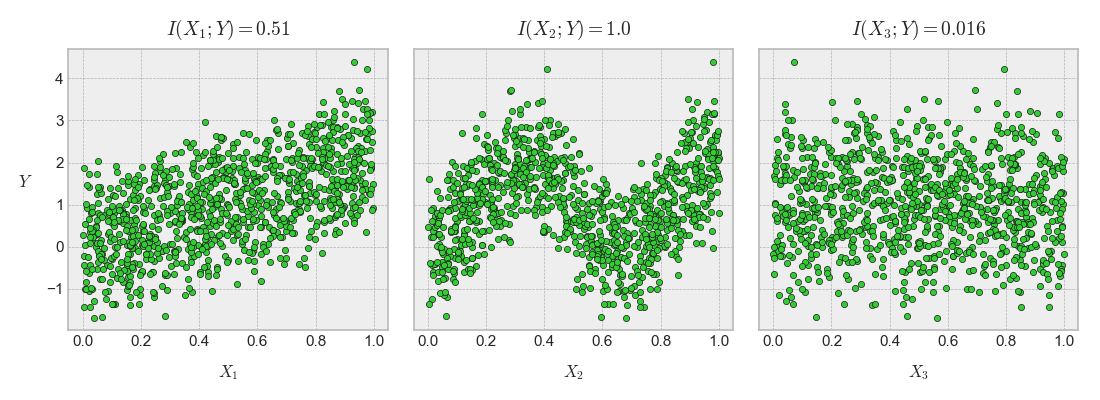

In [30]:
# Construimos los gráficos de dispersión correspondientes.
fig, ax = plt.subplots(nrows=1, ncols=X.shape[1], figsize=(11, 4), sharey=True)
for j in range(X.shape[1]):
    ax[j].scatter(X[:, j], y, ec="k", s=20, color="limegreen")
    ax[j].set_xlabel("$X_{}$".format(j + 1), fontsize=12, labelpad=10)
    ax[j].set_title("$I(X_{};Y) = $".format(j + 1) +  "${}$".format(mi[j].round(3)), fontsize=14, pad=10)
ax[0].set_ylabel("$Y$", rotation=0, fontsize=12, labelpad=15)
plt.tight_layout()

La visualización anterior permite darle un sentido más tangible a los resultados anteriores. Es evidente que la información mutua normalizada $I(X_{2};Y)$ es la más fuerte, ya que la fuerza de tal correlación se aprecia como mucho mayor que en el caso de $Y$ y $X_{1}$. mientras que la nube de puntos resultante entre $Y$ y $X_{3}$ es difusa y sin una geometría definida, lo que permite entender porqué el valor (normalizado) de $I(X_{3};Y)$ es tan bajo.
◼︎

## Divergencia de Kullback-Leibler.
Consideremos un sistema cuyos estímulos pueden representarse por medio de las realizaciones conjuntas de una colección de $n$ variables aleatorias $X_{1},...,X_{n}$, y que se agrupan en un vector aleatorio ${\mathbf{X}}$. La respuesta de este sistema a tales estímulos de entrada se representa por medio de una variable aleatoria $Y$, cuyas realizaciones representan a su vez el número (posiblemente infinito) de estados que éste tiene. Como vimos previamente, la información mutua $I(X_{j};Y)$ (para $1\leq j\leq n$) nos permite tener una muy buena idea del nivel de dependencia existente entre las $n$ variables aleatorias $X_{1},...,X_{n}$ e $Y$. Sin embargo, en un caso práctico, es probable que $\mathbf{X}$ no sea la única combinación posible de variables de entrada que deseemos utilizar para representar los estímulos que excitan al sistema, y existan ciertos cambios que queramos hacer entre las variables (aleatorias) que lo componen. Sea $\mathbf{Z}$ otra colección de variables aleatorias que representan la entrada del sistema, donde posiblemente las componentes sean *casi todas* iguales a las de $\mathbf{X}$. Estamos interesados en saber si la información representada por $\mathbf{X}$ puede compararse a la de $\mathbf{Z}$ de alguna manera. O, equivalentemente, qué tan parecidas son las funciones de densidad conjunta de $\mathbf{X}$ y de $\mathbf{Z}$. Para responder a esta pregunta, necesitamos disponer de una medición de **entropía relativa** que nos permita entender *qué tan parecidas son* estas variables, por lo que vamos a formalizar una nueva definición.

**<font color='blue'>Definición 8.5 – Divergencia de Kullback-Leibler:</font>** Sean $X, Z:\Omega \longrightarrow \mathbb{N}$ dos variables aleatorias discretas definidas sobre el mismo espacio muestral, siendo $p_{X}$ y $p_{Z}$ sus correspondientes funciones de masa de probabilidad. Definimos la **divergencia de Kullback-Leibler (o divergencia KL)** entre $p_{X}$ y $p_{Z}$, llamada también **entropía relativa** *desde* $p_{Z}$ a $p_{X}$, como

$$D_{KL}\left( X\| Z\right)  :=\sum_{x\in \Omega } p_{X}\left( x\right)  \log \left( \frac{p_{X}\left( x\right)  }{p_{Z}\left( x\right)  } \right)  =-\sum_{x\in \Omega } p_{X}\left( x\right)  \log \left( \frac{p_{Z}\left( x\right)  }{p_{X}\left( x\right)  } \right)$$
<p style="text-align: right;">$(8.40)$</p>

La divergencia KL suele denotarse igualmente por medio de las funciones de densidad involucradas. Es decir, podemos escribir $D_{KL}\left( f_{X}\| f_{Z}\right)$ en vez de $D_{KL}\left( X\| Z\right)$.

En términos intuitivos, dado que la fórmula (8.40) representa el valor esperado de la diferencia logarítmica entre las probabilidades $p_{X}$ y $p_{Z}$ con respecto a la función de masa $p_{X}$, la divergencia de Kullback-Leibler $D_{KL}\left( X\| Z\right)$ puede interpretarse como la diferencia promedio de la cantidad de información requerida para codificar muestras de $X$ usando un código optimizado por $Z$ en vez de uno optimizado por $X$. De esta manera, la cantidad $D_{KL}\left( X\| Z\right)$ puede ser idealizada como una distancia de naturaleza puramente estadística, ya que nos estimar medir qué tan diferente es una función de masa de probabilidad ($p_{Z}$) de otra que usualmente utilizamos como referencia ($p_{X}$). Sin embargo, la divergencia KL no es una métrica como tal (en el sentido de una definición algebraica de distancia), como veremos un poco más adelante.

Para el caso en el cual $X, Z:\Omega \longrightarrow \mathbb{R}$ son variables aleatorias continuas, con funciones de densidad $f_{X}$ y $f_{Z}$, respectivamente, la divergencia KL *desde* $f_{Z}$ a $f_{X}$ puede definirse como

$$D_{KL}\left( X\| Z\right)  :=\int_{\Omega } f_{X}\left( x\right)  \log \left( \frac{f_{X}\left( x\right)  }{f_{Z}\left( x\right)  } \right)  dx$$
<p style="text-align: right;">$(8.41)$</p>

Independiente de la naturaleza de las variables aleatorias involucradas, $X$ y $Z$, la divergencia KL que describe la diferencia entre sus masas o densidades de probabilidad ($f_{X}$ y $f_{Z}$, respectivamente, para el caso continuo) cumple con ciertas propiedades deseables:

- **(P1):** La divergencia KL siempre es **no negativa**: $D_{KL}\left( X\| Z\right)\geq 0$. La igualdad se da si y sólo si $X=Z$.
- **(P2):** En el caso continuo, $D_{KL}\left( X\| Z\right)\geq 0$ no está (necesariamente) acotada superiormente. Sin embargo, si $p_{X}$ y $p_{Z}$ son funciones de densidad que describen la misma variable aleatoria (como en el caso de una prueba de bondad del ajuste), entonces es $D_{KL}\left( X\| Z\right)\geq 0$ *sí puede* estar acotada superiormente.
- La divergencia KL está bien definida para distribuciones continuas y, además, **es invariante frente a transformaciones paramétricas** (como cambios de variables). Si $X$ e $Y$ son variables aleatorias tales que $Y=s(X)$ para alguna función $s:X \longrightarrow Y$, entonces

$$D_{KL}\left( f_{X}\| g_{X}\right)  =D_{KL}\left( f_{Y}\| g_{Y}\right)$$
<p style="text-align: right;">$(8.42)$</p>

- La divergencia KL es **aditiva para distribuciones independientes**, de la misma forma que la entropía (absoluta). Si $p_{1}$ y $p_{2}$ son funciones de densidad independientes tales que $p(x,y)=p_{1}(x)p_{2}(y)$, y de la misma forma, $q(x,y)=q_{1}(x)q_{2}(y)$ para las funciones de densidad independientes $q_{1}$ y $q_{2}$

$$D_{KL}\left( p\| q\right)  =D_{KL}\left( p_{1}\| q_{1}\right)  +D_{KL}\left( p_{2}\| q_{2}\right)$$
<p style="text-align: right;">$(8.43)$</p>

### Relación de la divergencia KL con la información mutua.
La información mutua $I(X;Y)$ entre las variables aleatorias $X$ e $Y$ tiene una interpretación interesante en términos de la divergencia de Kullback-Leibler. Sin pérdida de generalidad, supondremos que $X$ e $Y$ son variables aleatorias discretas con el mismo espacio muestral $\Omega$. Si $p_{X}$ y $p_{Y}$ son las funciones de masa de probabilidad para estas variables aleatorias, y si $p_{XY}$ es la función de masa conjunta para el vector aleatorio $(X,Y)$, se tiene que

$$I\left( X;Y\right)  =\sum_{x\in \Omega } \sum_{y\in \Omega } p_{XY}\left( x,y\right)  \log \left( \frac{p_{XY}\left( x,y\right)  }{p_{X}\left( x\right)  p_{Y}\left( y\right)  } \right)  $$
<p style="text-align: right;">$(8.44)$</p>

Notemos que, por la regla del producto de probabilidades,  se tiene que $p_{XY}\left( x,y\right)  =p_{Y}\left( y\right)  p_{X|Y=y}\left( x\right)$. Luego tenemos

$$\begin{array}{lll}I\left( X;Y\right)  &=&\displaystyle \sum_{x\in \Omega } \sum_{y\in \Omega } p_{XY}\left( x,y\right)  \log \left( \frac{p_{XY}\left( x,y\right)  }{p_{X}\left( x\right)  p_{Y}\left( y\right)  } \right)  \\ &=&\displaystyle \sum_{x\in \Omega } \sum_{y\in \Omega } p_{Y}\left( y\right)  p_{X|Y=y}\left( x\right)  \log \left( \frac{p_{Y}\left( y\right)  p_{X|Y=y}\left( x\right)  }{p_{X}\left( x\right)  p_{Y}\left( y\right)  } \right)  \\ &=&\displaystyle \sum_{y\in \Omega } p_{Y}\left( y\right)  \left[ \sum_{x\in \Omega } p_{X|Y=y}\left( x\right)  \log \left( \frac{p_{X|Y=y}\left( x\right)  }{p_{X}\left( x\right)  } \right)  \right]  \\ &=&\displaystyle \sum_{y\in \Omega } p_{Y}\left( y\right)  D_{KL}\left( p_{X|Y=y}\left( x\right)  \| p_{X}\left( x\right)  \right)  \\ &=&\mathrm{E}_{Y} \left[ D_{KL}\left( p_{X|Y}\| p_{X}\right)  \right]  \end{array}$$
<p style="text-align: right;">$(8.45)$</p>

Es decir,

$$I\left( X;Y\right)  =\mathrm{E}_{Y} \left[ D_{KL}\left( p_{X|Y}\| p_{X}\right)  \right]  =D_{KL}\left( p_{XY}\| p_{X}p_{Y}\right)  $$
<p style="text-align: right;">$(8.46)$</p>

De manera similar, es posible llegar a los mismos resultados para el caso en el cual $X$ e $Y$ son variables aleatorias continuas.

Notemos que, dadas las propiedades de la divergencia de Kullback-Leibler, es que $I(X;Y)$ es cero cuando $X$ e $Y$ son variables aleatorias independientes. Y eso es porque el valor de $D_{KL}\left( p_{XY}\| p_{X}p_{Y}\right)$ es igual a cero en ese caso, debido a la anulación del factor logarítmico en la primera de las expresiones del lado derecho en (8.45). Se tiene pues que la información mutua puede entenderse como el valor esperado de la divergencia de Kullback-Leibler de la función de densidad $p_{X}$ de $X$ *desde* la función de densidad condicional $p_{X|Y}$ de $X$ dado $Y$: Mientras más diferentes sean $p_{X}$ y $p_{X|Y}$ (en *promedio*), mayor será la ganancia de información (el valor de la correspondiente divergencia KL y, por extensión, de la información mutua).

## Entropía cruzada.
Vamos a proseguir con la ronda de conceptos fundamentales que hemos presentado en el contexto de la teoría de la información de Shannon discutiendo el concepto de **entropía cruzada** entre dos distribuciones de probabilidad. De manera intuitiva, si tenemos dos funciones de densidad $f$ y $g$, la entropía cruzada entre ambas sobre el mismo espacio muestral (la misma variable aleatoria subyacente) permite estimar el número de *bits* necesarios para identificar un evento determinado en un determinado conjunto de eventos posibles, si su esquema de condificación se describe por medio de la función de densidad (comúnmente teórica) $g$ en vez de la función $f$ (en general, una distribución *real*). Tiene sentido pues la siguiente definición.

**<font color='blue'>Definición 8.6 – Entropía cruzada:</font>** Sea $X:\Omega \longrightarrow \mathbb{N}$ una variable aleatoria discreta. Sean las funciones de masa de probabilidad $f$ y $g$ que describen todas las realizaciones de $X$. Se define la **entropía cruzada** de $g$ relativa a $f$ sobre el espacio muestral $\Omega$ como

$$H\left( f,g\right)  :=H\left( f\right)  +D_{KL}\left( f\  \| \  g\right)   $$
<p style="text-align: right;">$(8.47)$</p>

Es decir, en forma explícita,

$$H\left( f,g\right)  =-\sum_{x\in \Omega } f\left( x\right)  \log \left( g\left( x\right)  \right)$$
<p style="text-align: right;">$(8.48)$</p>

Notemos que, a diferencia de todas las mediciones de entropía que hemos definido previamente, la entropía condicional toma como argumentos las funciones de masa de probabilidad de forma directa en vez de la variable aleatoria a la cual tales funciones hacen referencia. Esto es importante, puesto que la entropía conjunta tiene una notación similar, pero haciendo referencia directamente a las variables aleatorias de interés).

La extensión de la fórmula (8.48) al caso en el cual $f$ y $g$ son funciones de densidad que describen variables aleatorias continuas no es trivial, y requiere definir el **espacio de probabilidad** sobre el cual la variable aleatoria $X$ está definida (con su correspondiente medida de probabilidad y $\sigma$-álgebra, como vimos en la [clase 1.5](https://github.com/rquezadac/udd_data_science_lectures/blob/main/PARTE%20I%20-%20Fundamentos%20matem%C3%A1ticos%20elementales/clase_1_5.ipynb)). Para efectos de nuestros apuntes, bastará con considerar únicamente el caso discreto.

**Ejemplo 8.5 – El modelo de regresión logística binaria:** La función de entropía cruzada suele ser utilizada en el contexto de los algoritmos de aprendizaje a fin de definir una **función de costo**. Estas funciones son de gran importancia en la construcción de modelos predictivos, puesto que son las que permiten, de alguna manera, controlar el error que cometen tales modelos a medida que éstos son entrenados (lo que justifica el nombre de *función de costo*). 

En particular, la entropía cruzada es una función de costo típicamente utilizada en la construcción de **modelos de clasificación**: Dadas las variables aletorias $X_{1},...,X_{n}$ que representan la entrada de un sistema determinado, estamos interesados en estimar las probabilidades de ocurrencia de todos los estados posibles del sistema. Es decir, si $Y$ es una variable aleatoria que describe tales estados, y suponiendo que el sistema puede tener un total de $k$ estados posibles, se tendrá que $Y=\left\{ y_{1},...,y_{k}\right\}  $. Por lo tanto, el **objetivo** de un modelo de clasificación es construir una función $h$ del tipo

$$P\left( Y=y_{s}\right)  =f\left( X_{1},...,X_{n}\right)  $$
<p style="text-align: right;">$(8.49)$</p>

para $s=1,...,k$.

Consideremos el caso más simple de todos, en el cual la variable aleatoria $Y$ sólo puede tomar dos valores, que convenientemente designamos como $1$ y $0$. Dado un vector aleatorio $\mathbf{X}=(X_{1},...,X_{n})$ que aglutina a todas las variables de entrada del modelo, queremos estimar la probabilidad $P(Y=1)$ por medio de una función $\sigma:\mathbb{R} \longrightarrow [0, 1]$, llamada **función logística**, definida como

$$\sigma \left( \mathbf{x} \right)  =\frac{1}{1+\exp \left( -\left< \mathbf{w} ,\mathbf{x} \right>  \right)  } $$
<p style="text-align: right;">$(8.50)$</p>

Donde $\mathbf{x}\in \mathbb{R}^{n}$ es una realización del vector aleatorio $\mathbf{X}$, $\mathbf{w}\in \mathbb{R}$ es un vector de parámetros que deseamos estimar y $\left< \mathbf{w} ,\mathbf{x} \right>$ es el producto interno usual en $\mathbb{R}^{n}$. Si escribimos $\mathbf{x}=(x_{1},...,x_{n})$ y $\mathbf{w}=(w_{1},...,w_{n})$, la ecuación (8.50) puede redefinirse como

$$\sigma \left( x_{1},...,x_{n}\right)  =\frac{1}{1+\exp \left( -\displaystyle \sum^{n}_{j=1} w_{j}x_{j}\right)  } $$
<p style="text-align: right;">$(8.51)$</p>

Este modelo es llamado **modelo de regresión logística binaria** (RLB), donde la palabra *binaria* hace referencia al hecho de que $Y$ puede tomar sólo dos valores.

En un contexto ligado a la teoría de la información, es claro que la construcción del modelo (8.50) implica necesariamente la definición de dos funciones de probabilidad que son complementarias. La primera describe la probabilidad $P(y_{i}=1)$, y la denotamos como $q_{y_{i}=1}$, donde $i$ simplemente indexa una determinada realización para el par $(\mathbf{X}, Y)$. La segunda es el complemento de $q_{y_{i}=1}$, a saber, $q_{y_{i}=0}=1-q_{y_{i}=1}=P(y_{i}=0)$. Designemos además las estimaciones del modelo (8.51) como $\hat{y}_{i}=q_{y_{i}=1}$. Con esta notación, el modelo RLB toma la forma

$$\hat{y}_{i}=\frac{1}{1+\exp \left( -\sum^{n}_{j=1} w_{j}x_{ij}\right)  } \  ;\  i=1,...,m$$
<p style="text-align: right;">$(8.52)$</p>

donde $m$ es el total de realizaciones del par $(\mathbf{X},Y)$ que se extraen de las correspondientes funciones de densidad para construir el modelo.

La construcción del modelo (8.52) requiere del uso de una función de costo, que permita comparar el *valor real* de $y_{i}$ con la correspondiente estimación $\hat{y}_{i}$. Si llamamos $p$ y $q$ a las funciones que describen las probabilidades asociadas $y_{i}$ y $\hat{y}_{i}$, una buena medida de similitud entre ambas funciones de probabilidad es precisamente la entropía cruzada promedio $H(p,q)$ para las $m$ observaciones que constituye la data con la que construimos el modelo. Es decir,

$$H\left( p,q\right)  =-\frac{1}{m} \sum^{m}_{i=1} p_{i}\log \left( q_{i}\right)  =-\frac{1}{m} \left[ \sum^{m}_{i=1} \underbrace{y_{i}\log \left( \hat{y}_{i} \right)  }_{\begin{matrix}\mathrm{comparacion\  de} \\ \mathrm{probabilidades\  para} \\ \mathrm{el\  caso} \  y_{i}=1\end{matrix} } -\underbrace{\left( 1-y_{i}\right)  \log \left( 1-\hat{y}_{i} \right)  }_{\begin{matrix}\mathrm{comparacion\  de} \\ \mathrm{probabilidades\  para} \\ \mathrm{el\  caso} \  y_{i}=0\end{matrix} } \right]  $$
<p style="text-align: right;">$(8.53)$</p>

Notemos que el sumando $y_{i}\log \left( \hat{y}_{i} \right)  $ está compuesto por el valor real $y_{i}$, que únicamente puede ser igual a 1 o 0, y por el logaritmo $\log(\hat{y}_{i})$, que *penaliza* o *castiga* las estimaciones incorrectas. De esta manera, si $y_{i}$ es igual a 1, eseperaríamos que la estimación $\hat{y}_{i}=q_{y_{i}=1}$ sea también igual a 1. Si no es así, el valor de este sumando crecerá mientras menor sea la probabilidad $q_{y_{i}=1}$ estimada por el modelo. Esto mismo ocurre para el sumando $\left( 1-y_{i}\right)  \log \left( 1-\hat{y}_{i} \right)$, donde penalizamos el caso $y_{i}=0$ usando las correspondientes probabilidades complementarias.

La estimación de los parámetros $w_{1},...,w_{n}$ resulta de la solución del problema de maximizar el valor de la entropía cruzada $H(p,q)$, para lo cual la mayoría de las librerías especializadas de Python, como **<font color='mediumorchid'>Scikit-Learn</font>**, hacen uso de algoritmos especializados, como el de gradiente descendente, visto en la [clase 1.6](https://github.com/rquezadac/udd_data_science_lectures/blob/main/PARTE%20I%20-%20Fundamentos%20matem%C3%A1ticos%20elementales/clase_1_6.ipynb). ◼︎

## Perplejidad.
Finalizaremos la lista de conceptos elementales de la teoría de la información formalizando uno de los conceptos más interesantes de la misma, y que se conoce como **perplejidad**. Se trata de una medida de la incertidumbre asociada al valor de una muestra extraída desde una distribución discreta de probabilidad. Como tal, mientras mayor sea su valor, es menos probable que un observador pueda *adivinar* el valor que será extraído de una distribución. Se trata de un concepto moderno, no introducido originalmente por Shannon, que fue desarrollado en la década de 1970 en el contexto del **reconocimiento del lenguaje hablado** por medio del uso de ordenares. La perplejidad es, por tanto, un elemento de extrema importancia en el contexto del **procesamiento del lenguaje natural**.

**<font color='blue'>Definición 8.7 – Perplejidad:</font>** Sea $p:\Omega \longrightarrow [0,1]$ una función de masa de probabilidad para una determinada variable aleatoria discreta $X:\Omega \longrightarrow \mathbb{N}$. Sea además $H(X)$ la entropía absoluta de la variable aleatoria $X$ con respeto a la función de masa $p$, con base logarítmica $b$ (véase fórmula (8.4)). La **perplejidad** de $X$ con respecto a la función de masa $p$ se define como

$$PP\left( X;p\right)  :=b^{H\left( X\right)  }$$
<p style="text-align: right;">$(8.54)$</p>

Notemos que $b=2$ si la entropía está medida en bits. En este caso particular, la fórmula (8.54) puede expandirse como

$$PP\left( X;p\right)  =2^{\overbrace{-\sum_{\Omega } p\left( x\right)  \log_{2} \left( p\left( x\right)  \right)  }^{\mathrm{formula(8.4)} } }=\underbrace{\prod_{\Omega } p\left( x\right)^{-p\left( x\right)  }  }_{\mathrm{propiedades\  de\  los\  logaritmos} } $$
<p style="text-align: right;">$(8.55)$</p>

Por lo que, a diferencia de lo que observamos en la ecuación (8.54), la perplejidad es una métrica de incertidumbre que es independiente de la base utilizada en el cálculo de la entropía de la variable aleatoria de interés.

La perplejidad es una métrica de incertidumbre que suele usarse en vez de la entropía en muchos campos de la estadística y, por supuesto, en el aprendizaje automático. Lo anterior se debe a que se trata de un concepto mucho más intuitivo que la entropía. La razón de aquello es sencilla: Como discutimos al inicio de esta sección, la entropía es una métrica que permite describir la cantidad promedio de información (por ejemplo, en bits) necesaria para codificar un conjunto de valores aleatorios muestreados a partir de una distribución. Esta definición no es particularmente difícil de entender, pero no es *intuitiva* en el sentido de que un valor de entropía dado, digamos $H(X)=10$, no nos dice mucho por sí solo acerca de $X$ o de la función de masa de probabilidad que se ha utilizado para su cálculo.

Por otro lado, la perplejidad sí nos provee de valores intuitivos. Consideremos el caso de una variable aleatoria discreta $X$ uniformamente distribuida, cuyas $k$ realizaciones son todas equiprobables. De esta forma, su función de masa de probabilidad es $p(x)=1/k$ y, por tanto, se tendrá que

$$\begin{array}{lll}PP\left( X;p\right)  &=&2^{H\left( X\right)  }\\ &=&2^{\frac{1}{k} \left( -\sum^{k}_{i=1} \log_{2} \left( \frac{1}{k} \right)  \right)  }\\ &=&2^{-\log_{2} \left( \frac{1}{k} \right)  }\\ &=&\frac{1}{2^{\log_{2} \left( \frac{1}{k} \right)  }} \\ &=&k\end{array} $$
<p style="text-align: right;">$(8.56)$</p>

Es decir, la perplejidad de una variable aleatoria discreta $X$ con $k$ estados equiprobables es igual a $k$. Esto puede aplicarse a una enorme cantidad de experimentos. Por ejemplo, la perplejidad de una moneda no trucada es igual a $2$, y la de un dado no cargado es igual a $6$. Esto nos entrega un enfoque mucho más intuitivo en términos de la incertidumbre asociada a una variable aleatoria, o bien, a un experimento descrito por su función de masa de probabilidad. Con los valores de referencia anteriores, una perplejidad igual a $20$ implica que la incertidumbre relativa al resultado de tal experimento sería la misma que la asociada al lanzamiento de un dado de $20$ caras. Algo indudablemente más incierto que los ejemplos anteriores.

**Ejemplo 8.6 - Perplejidad de un modelo probabilístico:** Un ejercicio relativamente común en estadística (y, evidentemente, en el aprendizaje automático) corresponde a la creación de un modelo que permita estimar una función de masa de probabilidad desconocida $p$ a partir de una cantidad finita de muestras extraídas desde $p$. Dado un *modelo de probabilidad* $q$, una pregunta típica que nos hacemos en esta tarea es *qué tan bien predice $q$ las probabilidades asociadas a las muestras de prueba $x_{1},...,x_{m}$ con respecto a las probabilidades determinadas por $p$ (suponiendo que conocemos tales valores)". De este modo, la perplejidad (sin pérdida de generalidad, en bits) del modelo $q$ puede escribirse como

$$2^{-\frac{1}{m} \sum^{m}_{i=1} \log_{2} \left( q\left( x_{i}\right)  \right)  }=\left( \prod^{m}_{i=1} q\left( x_{i}\right)  \right)^{-1/m}$$
<p style="text-align: right;">$(8.57)$</p>

Las muestras $x_{1},...,x_{m}$ son llamadas *de prueba* porque son nuevas, en el sentido de que no fueron utilizadas para construir nuestro modelo. Es decir, el modelo $q$ *no las conoce* y, por lo tanto, tiene sentido hablar de la *sorpresa* que generan tales muestras para este modelo. De esta manera, un mejor modelo tenderá a asignar mayores probabilidades $q(x_{i})$ ($1\leq i\leq m$) a los eventos que representan tales muestras y, como resultado, tendrá menor perplejidad. Esto significa que el modelo presentará una *menor sorpresa* con estos datos de prueba.